In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:87% !important; }</style>"))

# Load Enviroment

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None) #Permite ver todas las columnas.
pd.set_option('display.max_rows', None) #Permite ver todas las filas

In [24]:
import json
import meaningcloud
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# Load data

In [4]:
filename = '../data/PredictLand.json'

In [5]:
with open(filename, 'r', encoding='utf-8') as f:
    datastore = json.load(f)

In [6]:
datastore.values()

dict_values([{'title': 'General Motors, Alliance Healthcare, PredictLand y Antonio Gabarrús, Premios TICBOX - elEconomista.es', 'new': 'Alliance Healtcare ganó el premio TICBOX al mejor Proyecto Innovador TIC. General Motors obtuvo el reconocimiento al mejor Proyecto TIC Colaborativo. La joven empresa PredictLand resultó ganadora del Premio Ibercaja a la Empresa Emprendedora en el ámbito de la Economía Digital, y Antonio Gabarrús recibió el galardón a la trayectoria profesional TIC. El Congreso de Innovación, Tecnología y Transformación Digital TICBOX, que se desarrolló ayer en eTOPIA_ con una importante afluencia de profesionales y expositores, cerró su jornada otorgando el reconocimiento a la Excelencia Digital en las cuatro categorías citadas. La iniciativa Symphony de Alliance Healthcare obtuvo el garlardón al mejor proyecto innovador TIC. Se trata de un sistema experto que apoya la toma de decisiones para el profesional farmaceútico, ayudando a detectar riesgos durante el desarrol

In [7]:
df = pd.DataFrame(datastore.values())

In [8]:
df.head(10)

date      keyword  \
0   9 jun. 2017  PredictLand   
1  17 may. 2019  PredictLand   
2  29 may. 2019  PredictLand   
3  24 feb. 2018  PredictLand   
4  12 feb. 2018  PredictLand   
5  14 jun. 2018  PredictLand   
6  24 may. 2018  PredictLand   

                                                 new           source  \
0  Alliance Healtcare ganó el premio TICBOX al me...  elEconomista.es   
1  El I Congreso de Inteligencia Artificial de Ar...  elEconomista.es   
2  El Foro Tecnológico y Empresarial, organizado ...  elEconomista.es   
3  La posibilidad de gestionar hoy tanta informac...       Heraldo.es   
4  La Ciencia de los Datos tiene hoy en día múlti...  elEconomista.es   
5  Unas 350 personas participan en la II edición ...       Heraldo.es   
6   1 min   23.05.2018 - 14:02 La celebra sus , e...         ConSalud   

                                               title  
0  General Motors, Alliance Healthcare, PredictLa...  
1  Zaragoza se convierte en la sede de la Intelig...  
2  El impacto de la Inteligencia Artificial en la...  
3  El dato es el nuevo petróleo | Noticias de Eco...  
4  Aplicaciones prácticas de la Ciencia de los Da...  
5  "Cada vez más la tecnología trabaja con el neg...  
6  El CEO del Grupo Mediforum en las XIX Jornadas...

# Transformations

Separación de 'date' en columnas

In [9]:
df[['day', 'month', 'year']] = df['date'].str.split(expand=True)
df.head(3)

date      keyword  \
0   9 jun. 2017  PredictLand   
1  17 may. 2019  PredictLand   
2  29 may. 2019  PredictLand   

                                                 new           source  \
0  Alliance Healtcare ganó el premio TICBOX al me...  elEconomista.es   
1  El I Congreso de Inteligencia Artificial de Ar...  elEconomista.es   
2  El Foro Tecnológico y Empresarial, organizado ...  elEconomista.es   

                                               title day month  year  
0  General Motors, Alliance Healthcare, PredictLa...   9  jun.  2017  
1  Zaragoza se convierte en la sede de la Intelig...  17  may.  2019  
2  El impacto de la Inteligencia Artificial en la...  29  may.  2019

Convertir strings en numérico

In [10]:
mapping = {'jan.':1, 'feb.':2, 'mar.':3, 'apr.':4, 'may.':5, 'jun.':6, 'jul.':7, 'aug.':8, 'sep.':9, 'oct.':10, 'nov.':11, 'dec.':12}
df[['month']] = df[['month']].applymap(mapping.get).astype(int)
df.head(3)

date      keyword  \
0   9 jun. 2017  PredictLand   
1  17 may. 2019  PredictLand   
2  29 may. 2019  PredictLand   

                                                 new           source  \
0  Alliance Healtcare ganó el premio TICBOX al me...  elEconomista.es   
1  El I Congreso de Inteligencia Artificial de Ar...  elEconomista.es   
2  El Foro Tecnológico y Empresarial, organizado ...  elEconomista.es   

                                               title day  month  year  
0  General Motors, Alliance Healthcare, PredictLa...   9      6  2017  
1  Zaragoza se convierte en la sede de la Intelig...  17      5  2019  
2  El impacto de la Inteligencia Artificial en la...  29      5  2019

Columnas de 'date' ayudan a convertirla en tipo fecha

In [11]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.head(10)

date      keyword                                                new  \
0 2017-06-09  PredictLand  Alliance Healtcare ganó el premio TICBOX al me...   
1 2019-05-17  PredictLand  El I Congreso de Inteligencia Artificial de Ar...   
2 2019-05-29  PredictLand  El Foro Tecnológico y Empresarial, organizado ...   
3 2018-02-24  PredictLand  La posibilidad de gestionar hoy tanta informac...   
4 2018-02-12  PredictLand  La Ciencia de los Datos tiene hoy en día múlti...   
5 2018-06-14  PredictLand  Unas 350 personas participan en la II edición ...   
6 2018-05-24  PredictLand   1 min   23.05.2018 - 14:02 La celebra sus , e...   

            source                                              title day  \
0  elEconomista.es  General Motors, Alliance Healthcare, PredictLa...   9   
1  elEconomista.es  Zaragoza se convierte en la sede de la Intelig...  17   
2  elEconomista.es  El impacto de la Inteligencia Artificial en la...  29   
3       Heraldo.es  El dato es el nuevo petróleo | Noticias de Eco...  24   
4  elEconomista.es  Aplicaciones prácticas de la Ciencia de los Da...  12   
5       Heraldo.es  "Cada vez más la tecnología trabaja con el neg...  14   
6         ConSalud  El CEO del Grupo Mediforum en las XIX Jornadas...  24   

   month  year  
0      6  2017  
1      5  2019  
2      5  2019  
3      2  2018  
4      2  2018  
5      6  2018  
6      5  2018

# Sentiment Analysis

With the following text example:

In [12]:
df.new[0]

'Alliance Healtcare ganó el premio TICBOX al mejor Proyecto Innovador TIC. General Motors obtuvo el reconocimiento al mejor Proyecto TIC Colaborativo. La joven empresa PredictLand resultó ganadora del Premio Ibercaja a la Empresa Emprendedora en el ámbito de la Economía Digital, y Antonio Gabarrús recibió el galardón a la trayectoria profesional TIC. El Congreso de Innovación, Tecnología y Transformación Digital TICBOX, que se desarrolló ayer en eTOPIA_ con una importante afluencia de profesionales y expositores, cerró su jornada otorgando el reconocimiento a la Excelencia Digital en las cuatro categorías citadas. La iniciativa Symphony de Alliance Healthcare obtuvo el garlardón al mejor proyecto innovador TIC. Se trata de un sistema experto que apoya la toma de decisiones para el profesional farmaceútico, ayudando a detectar riesgos durante el desarrollo de los tratamientos y evitando costes añadidos o unempeoramiento en la evolución del paciente. Esta desarrollado desde Aragón para s

&nbsp;

## MeaningCloud API

**Carácter de los comentarios:**

- P+: Muy positivo
- P: Positivo
- NEU: Neutral
- N: Negativo
- N+: Muy negativo

In [13]:
def sentiments_analisis(text, lang):
    license_key = '63eaf9a101820b692f5545a029942671'
    
    try:
    # Petición de los sentimientos a la API de meaningcloud
        topics_sentiments =  meaningcloud.TopicsResponse(meaningcloud.SentimentRequest(license_key, txt=text, lang=lang).sendReq())


        if (topics_sentiments.isSuccessful()):
            print("\nThe request to 'Topics Extraction' finished successfully!\n")

        else:
            if(topics_sentiments.getResponse() is None):
                print("\nNo se ha devuelto un JSON\n")
            else:
                print("\nError: " + topics_sentiments.getStatusMsg() + "\n")


    except ValueError:
        e = sys.exc_info()[0]
        print("\nException: " + str(e))
        
    return(topics_sentiments)

In [14]:
sa = sentiments_analisis(df.new[0], 'es')


The request to 'Topics Extraction' finished successfully!



In [15]:
sa.getResponse()

{'status': {'code': '0',
  'msg': 'OK',
  'credits': '1',
  'remaining_credits': '19991'},
 'model': 'general_es',
 'score_tag': 'P',
 'agreement': 'DISAGREEMENT',
 'subjectivity': 'SUBJECTIVE',
 'confidence': '92',
 'irony': 'NONIRONIC',
 'sentence_list': [{'text': 'Alliance Healtcare ganó el premio TICBOX al mejor Proyecto Innovador TIC.',
   'inip': '0',
   'endp': '72',
   'bop': 'y',
   'confidence': '100',
   'score_tag': 'P',
   'agreement': 'AGREEMENT',
   'segment_list': [{'text': 'Alliance Healtcare ganó el premio TICBOX al mejor Proyecto Innovador TIC',
     'segment_type': 'main',
     'inip': '0',
     'endp': '71',
     'confidence': '100',
     'score_tag': 'P',
     'agreement': 'AGREEMENT',
     'polarity_term_list': [{'text': '(ganar) bueno@A',
       'inip': '44',
       'endp': '48',
       'confidence': '100',
       'score_tag': 'P',
       'sentimented_entity_list': [{'form': 'Alliance Healtcare',
         'id': '__7490449817647352062',
         'variant': 'Allia

In [16]:
scores = [x['score_tag'] for x in sa.getResponse()['sentence_list']]
confidences = [float(x['confidence']) for x in sa.getResponse()['sentence_list']]
texts = [x['text'] for x in sa.getResponse()['sentence_list']]
df_sent = pd.DataFrame({'score_tag':scores, 
                        'confidence':confidences,
                        'text':texts}).sort_values(by='confidence', ascending=True).reset_index(drop=True)
df_sent

score_tag  confidence                                               text
0         P+        98.0  Comenzó su larga carrera en empresas como BULL...
1          P       100.0  Alliance Healtcare ganó el premio TICBOX al me...
2          P       100.0  General Motors obtuvo el reconocimiento al mej...
3         P+       100.0  La joven empresa PredictLand resultó ganadora ...
4          N       100.0  El Congreso de Innovación, Tecnología y Transf...
5          P       100.0  La iniciativa Symphony de Alliance Healthcare ...
6          P       100.0  Se trata de un sistema experto que apoya la to...
7       NONE       100.0  Esta desarrollado desde Aragón para su aplicac...
8         P+       100.0  El mejor proyecto colaborativo TIC tuvo como t...
9          P       100.0  El grupo, liderado por General Motors, contó c...
10      NONE       100.0  Desarrolló su labor durante el segundo semestr...
11         P       100.0  redicLand, una joven y pujante empresa especia...
12        N+       100.0  Los asistentes al congreso tuvieron ocasión de...
13        P+       100.0  Por último, Antonio Gabarrús fue reconocido co...
14      NONE       100.0  Todos los detalles del congreso y concurso se ...

## GoogleCloud API

Configuración: https://cloud.google.com/natural-language/docs/quickstart#set_up_a_project

Sentiment Analysis Tutorial: https://cloud.google.com/natural-language/docs/sentiment-tutorial


&nbsp; 

**`Facturación`**: https://console.developers.google.com/billing/0195A2-9C5CBB-BD9DDC?authuser=0

**`Precios`**: https://cloud.google.com/natural-language/pricing?hl=es-419

**Interpretación**: https://cloud.google.com/natural-language/docs/basics?hl=es-419#sentiment-analysis-values
        
- `score` de los rangos de opiniones entre -1.0 (negativas) y 1.0 (positivas), y corresponde a la inclinación emocional total del texto.


- `magnitude` indica la fuerza total de la emoción (tanto positiva como negativa) dentro del texto dado, entre 0.0 y +inf. A diferencia de score, magnitude no está normalizada; cada expresión de emoción del texto (tanto positiva como negativa) contribuye a la magnitude del texto, por lo tanto, **bloques de texto más largos podrían tener magnitudes mayores**.

In [17]:
# Imports the Google Cloud client library
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

# Instantiates a client
client = language.LanguageServiceClient()

# The text to analyze
text = df.new[0]


document = types.Document(
    content=text,
    type=enums.Document.Type.PLAIN_TEXT)

# Detects the sentiment of the text
analysis = client.analyze_sentiment(document=document, encoding_type='UTF8')

print('Sentiment: {}, {}'.format(analysis.document_sentiment.score, analysis.document_sentiment.magnitude))

Sentiment: 0.6000000238418579, 10.300000190734863


In [18]:
analysis

document_sentiment {
  magnitude: 10.300000190734863
  score: 0.6000000238418579
}
language: "es"
sentences {
  text {
    content: "Alliance Healtcare gan\303\263 el premio TICBOX al mejor Proyecto Innovador TIC."
  }
  sentiment {
    magnitude: 0.800000011920929
    score: 0.800000011920929
  }
}
sentences {
  text {
    content: "General Motors obtuvo el reconocimiento al mejor Proyecto TIC Colaborativo."
    begin_offset: 75
  }
  sentiment {
    magnitude: 0.5
    score: 0.5
  }
}
sentences {
  text {
    content: "La joven empresa PredictLand result\303\263 ganadora del Premio Ibercaja a la Empresa Emprendedora en el \303\241mbito de la Econom\303\255a Digital, y Antonio Gabarr\303\272s recibi\303\263 el galard\303\263n a la trayectoria profesional TIC."
    begin_offset: 151
  }
  sentiment {
    magnitude: 0.699999988079071
    score: 0.699999988079071
  }
}
sentences {
  text {
    content: "El Congreso de Innovaci\303\263n, Tecnolog\303\255a y Transformaci\303\263n Digital T

### Defining functions

In [19]:
def extractSentiment(text):
    '''
    Función que devuelve el análisis de sentimientos de un texto dado como input.
    '''
    client = language.LanguageServiceClient()                                     # Instantiates a client   
    document = types.Document(content=text, type=enums.Document.Type.PLAIN_TEXT)
    analysis = client.analyze_sentiment(document=document, encoding_type='UTF8')  # Detects the sentiment of the text
    #print('Sentiment: {}, {}'.format(analysis.document_sentiment.score, analysis.document_sentiment.magnitude))
    return(analysis)

In [20]:
def sml(row, text_field):
    analysis = extractSentiment(row[text_field])
    row['score'] = analysis.document_sentiment.score
    row['magnitude'] = analysis.document_sentiment.magnitude
    row['language'] = analysis.language
    return(row)

In [21]:
df2 = df.apply(lambda x: sml(x, 'new'), axis=1).sort_values('date')
df2

date      keyword                                                new  \
0 2017-06-09  PredictLand  Alliance Healtcare ganó el premio TICBOX al me...   
4 2018-02-12  PredictLand  La Ciencia de los Datos tiene hoy en día múlti...   
3 2018-02-24  PredictLand  La posibilidad de gestionar hoy tanta informac...   
6 2018-05-24  PredictLand   1 min   23.05.2018 - 14:02 La celebra sus , e...   
5 2018-06-14  PredictLand  Unas 350 personas participan en la II edición ...   
1 2019-05-17  PredictLand  El I Congreso de Inteligencia Artificial de Ar...   
2 2019-05-29  PredictLand  El Foro Tecnológico y Empresarial, organizado ...   

            source                                              title day  \
0  elEconomista.es  General Motors, Alliance Healthcare, PredictLa...   9   
4  elEconomista.es  Aplicaciones prácticas de la Ciencia de los Da...  12   
3       Heraldo.es  El dato es el nuevo petróleo | Noticias de Eco...  24   
6         ConSalud  El CEO del Grupo Mediforum en las XIX Jornadas...  24   
5       Heraldo.es  "Cada vez más la tecnología trabaja con el neg...  14   
1  elEconomista.es  Zaragoza se convierte en la sede de la Intelig...  17   
2  elEconomista.es  El impacto de la Inteligencia Artificial en la...  29   

   month  year  score  magnitude language  
0      6  2017    0.6       10.3       es  
4      2  2018    0.6        6.8       es  
3      2  2018    0.2        6.4       es  
6      5  2018    0.3        2.9       es  
5      6  2018    0.1       11.8       es  
1      5  2019    0.1        6.2       es  
2      5  2019    0.5        6.3       es

In [22]:
def plot_sentimentAnalysis(score, date, title=None):
    fig, ax1 = plt.subplots(figsize=(10,5))
    
    #Plots
    line1 = ax1.plot(score, date, linestyle='-', marker='o', color='#64e2f4', linewidth=2)
    
    #Range
    ax1.set_ylim(-1, 1)
    
    #Format the ticks
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    years_fmt = mdates.DateFormatter('%Y')
    months_fmt = mdates.DateFormatter('%m')
    ax1.xaxis.set_major_locator(years)
    ax1.xaxis.set_major_formatter(years_fmt)
    ax1.xaxis.set_minor_locator(months)
    ax1.xaxis.set_minor_formatter(months_fmt)
    ax1.tick_params(axis='x', which='major', width=0, length=15)
    ax1.tick_params(which='minor', width=2, length=4)
    ax1.grid()
    
    #Titles
    plt.title(title, y=1, size=15,  weight='bold')
    plt.ylabel('score', color='dimgray', size = 13)
    plt.xlabel('date', color='dimgray', size = 13)
    
    #Show
    plt.show()

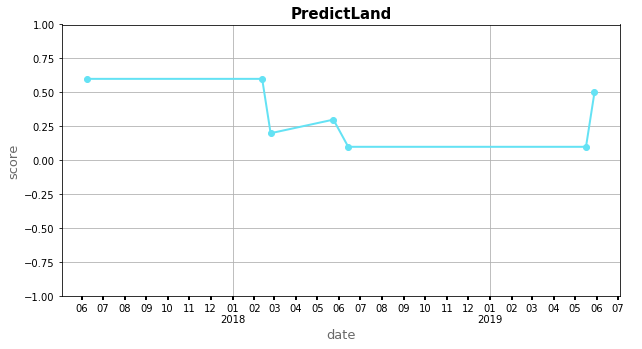

In [25]:
plot_sentimentAnalysis(df2.date, df2.score, title='PredictLand')